In [1]:
#Import basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Setting max rows to display
pd.set_option('display.max_rows', 500)

# Reading and Understanding the Data --> EDA

In [3]:
bike = pd.read_csv('day.csv')

In [4]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike.shape

(730, 16)

In [6]:
bike.info()
# There are no null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
#Drop some unwanted columns as they are not required
# instant - Just the row number, not meaningful for the analysis
# dteday - Its the date column, and can be dropped as most of the information is already splitted into other columns
# Casual & registered - building the model on cnt which is the sum of casual and registered, so we can drop these columns

bike = bike.drop(columns=['instant','dteday','registered','casual'],axis = 1)

In [10]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


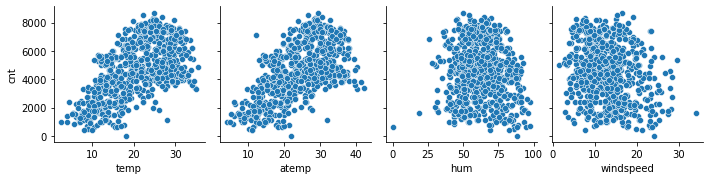

In [15]:
#Visualizing numeric variable with the count of rides
sns.pairplot(data = bike, x_vars = ['temp','atemp','hum','windspeed'], y_vars = ['cnt'])

Observation: We could see that there is some linear trend visible in the variable temp and a temp, but for humidity and winspeed the trend is not so clear. 

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

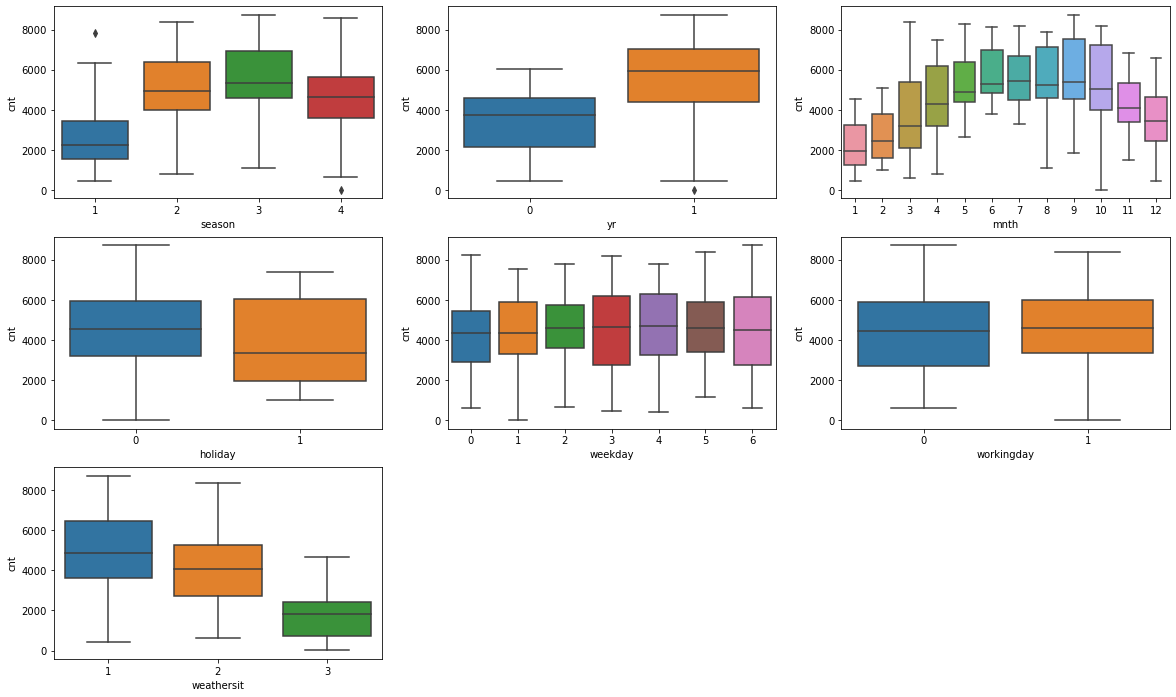

In [20]:
#Lets visualize the categorical columns also
plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.boxplot(data = bike, x = 'season',y = 'cnt')
plt.subplot(3,3,2)
sns.boxplot(data = bike, x = 'yr',y = 'cnt')
plt.subplot(3,3,3)
sns.boxplot(data = bike, x = 'mnth',y = 'cnt')
plt.subplot(3,3,4)
sns.boxplot(data = bike, x = 'holiday',y = 'cnt')
plt.subplot(3,3,5)
sns.boxplot(data = bike, x = 'weekday',y = 'cnt')
plt.subplot(3,3,6)
sns.boxplot(data = bike, x = 'workingday',y = 'cnt')
plt.subplot(3,3,7)
sns.boxplot(data = bike, x = 'weathersit',y = 'cnt')

Observation: 
Cnt vs season - We can see that in summer and fall, the number of rider are higher compared to spring and winter
Cnt vs year - Since the data is only for 2 years, and it is a startup company, the number of rides are growing so we have higher number of rides in 2019 compared with 2018
Cnt vs month - This plot also shows somewhat same trend as the season plot, the number of rides start increasing in the month of March April, peaks around Aug-Sep and then dips dowards the end of the year, it shows some kind of seasonal trend for the bike demand, something that we also saw in the temperature charts also. 
Cnt vs Holiday - The overall spread of the data is higher on holidays, but the median requests on non-holidays days are higher. 
Cnt vs weekday - Again there is no specific trend, but weekday 3 (Wednesday) and weekday 6 (Saturday) have higher spread. 
Cnt vs Workingday - Rides are slightly higher on working days. 
Cnt vs weathersit - Clear trend that the demand is higher when the skies are clear, no rain or snow (weathersit =1), demand goes very low when their is mist, rain or snowfall around (weathersit = 2 and 3)


# Prepare the data for modelling

#the categorical data in the dataset is already having numerical values
- Encoding:
    - Converting binary vars to 1 and 0
    - Converting other categorical variables to dummy values
- Test train split the data
- Scale the data
    
    

In [24]:
import sklearn
from sklearn.model_selection import train_test_split

bike_train,bike_test = train_test_split(bike,train_size=0.7, random_state=100)

(510, 12)


(220, 12)

In [25]:
#Rescaling the features
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [26]:
bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [29]:
bike.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [31]:
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
#Instantiate an object

scaler = MinMaxScaler()

# Fit on data (only numeric variables)
num_vars = ['temp','atemp','hum','windspeed','cnt']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
576,3,1,7,0,2,1,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,1,3,0,6,0,2,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,1,12,0,0,0,1,0.245101,0.200348,0.498067,0.663106,0.204096
482,2,1,4,0,6,0,2,0.395666,0.391735,0.504508,0.188475,0.482973
111,2,0,4,0,5,1,2,0.345824,0.318819,0.751824,0.380981,0.191095


# Training the model

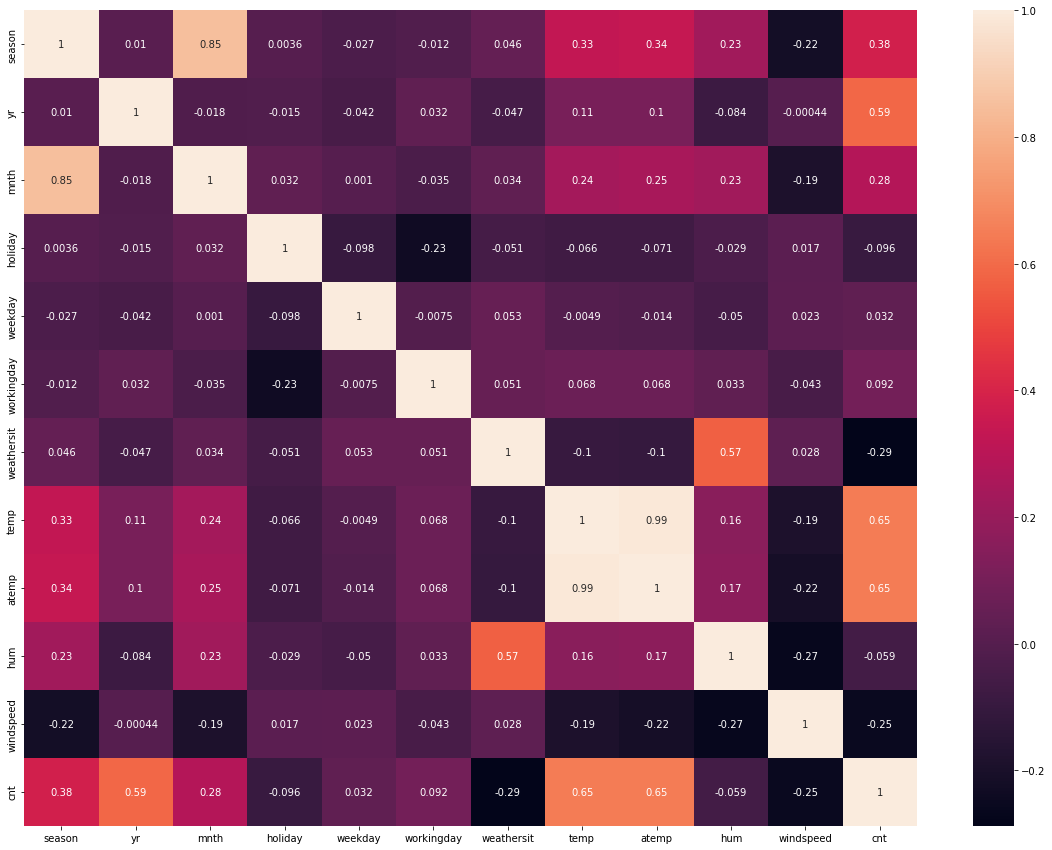

In [32]:
plt.figure(figsize = (20,15))
sns.heatmap(bike_train.corr(), annot = True)
plt.show()

Lets start building the model with temperature since temperature has highest coefficient

In [36]:
y_train = bike_train.pop('cnt')
X_train = bike_train

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

In [38]:
import statsmodels
import statsmodels.api as sm

#Build the model with only 1 variable i.e. temperature
#Add constant - 
X_train_sm = sm.add_constant(X_train['temp'])

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()

In [39]:
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [40]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           2.46e-61
Time:                        22:51:04   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#Lets add atemp into the model
#Build the model with only 1 variable i.e. temperature
#Add constant - 
X_train_sm = sm.add_constant(X_train[['temp','atemp']])

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()

In [43]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           8.38e-61
Time:                        22:53:08   Log-Likelihood:                 178.05
No. Observations:                 510   AIC:                            -350.1
Df Residuals:                     507   BIC:                            -337.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1627      0.020      8.198      0.000       0.124       0.202
temp           0.1853      0.233      0.796      0.426      -0.272       0.643
atemp          0.4896      0.248      1.977      0.049       0.003       0.976
==============================================================================
Omnibus:                        4.986   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                3.696
Skew:                           0.070   Prob(JB):                        0.158
Kurtosis:                       2.607   Cond. No.                         56.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#Lets add season into the model
#Build the model with only 1 variable i.e. temperature
#Add constant - 
X_train_sm = sm.add_constant(X_train[['temp','atemp','season']])

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()

In [46]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     138.2
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           2.05e-65
Time:                        22:55:27   Log-Likelihood:                 191.54
No. Observations:                 510   AIC:                            -375.1
Df Residuals:                     506   BIC:                            -358.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1030      0.022      4.591      0.000       0.059       0.147
temp           0.2269      0.227      0.999      0.318      -0.219       0.673
atemp          0.3804      0.242      1.570      0.117      -0.096       0.856
season         0.0371      0.007      5.243      0.000       0.023       0.051
==============================================================================
Omnibus:                        1.744   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.418   Jarque-Bera (JB):                1.592
Skew:                          -0.023   Prob(JB):                        0.451
Kurtosis:                       2.730   Cond. No.                         134.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#Lets add season into the model
#Build the model with only 1 variable i.e. temperature
#Add constant - 
X_train_sm = sm.add_constant(X_train[['temp','atemp','season','mnth']])

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     103.9
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           1.57e-64
Time:                        22:56:38   Log-Likelihood:                 192.06
No. Observations:                 510   AIC:                            -374.1
Df Residuals:                     505   BIC:                            -352.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1035      0.022      4.611      0.000       0.059       0.148
temp           0.2231      0.227      0.982      0.326      -0.223       0.669
atemp          0.3814      0.242      1.574      0.116      -0.095       0.857
season         0.0483      0.013      3.682      0.000       0.023       0.074
mnth          -0.0041      0.004     -1.014      0.311      -0.012       0.004
==============================================================================
Omnibus:                        1.678   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.432   Jarque-Bera (JB):                1.551
Skew:                          -0.028   Prob(JB):                        0.460
Kurtosis:                       2.736   Cond. No.                         356.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
#Lets add season into the model
#Build the model with only 1 variable i.e. temperature
#Add constant - 
feature_list = ['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']

for i in range(1,len(feature_list)):
    X_train_sm = sm.add_constant(X_train[feature_list[:i]])

    lr = sm.OLS(y_train,X_train_sm)

    lr_model = lr.fit()

    print(i)
    #print(lr_model.params)
    print(lr_model.summary())

1
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     85.84
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           5.50e-19
Time:                        23:04:40   Log-Likelihood:                 78.714
No. Observations:                 510   AIC:                            -153.4
Df Residuals:                     508   BIC:                            -145.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3203      0.023     14.054      0

9
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     211.3
Date:                Wed, 08 Jun 2022   Prob (F-statistic):          3.88e-164
Time:                        23:04:40   Log-Likelihood:                 439.11
No. Observations:                 510   AIC:                            -858.2
Df Residuals:                     500   BIC:                            -815.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1112      0.021      5.224      0